# Titanic Dataset: Exploratory Data Analysis

In this notebook, we're going to analyse the famous Titanic dataset from Kaggle. The dataset is meant for supervised machine learning, but we're only going to do some exploratory analysis at this stage.

We'll try to answer the following questions:

Who were the passengers on the Titanic? (age, gender, class.. etc)
What deck were the passengers on and how does that relate to their class?
Where did the passengers come from?
Who was alone and who was with family?
What factors helped someone survive the sinking?

In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
csv = "/Users/ligandrosy/Downloads/train1.csv"
data  =  pd.read_csv(csv)

In [8]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
titanic_df =data.set_index("PassengerId")

In [12]:
#Information about the dataset. 
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


From above, we see that the dataset is missing a lot of information in for the Cabin column. We'll need to deal with that when we go about using the cabin data.

Other information seems to be complete, except some Age entries.

In [13]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


A 1 in the Survived column means that the person survived, while a 0 mean that they died. So looking at the mean, we can say that only ~38% people survived the sinking.

## ->Who were the passengers on the Titanic?
Let's look at some demographical information about the passengers.

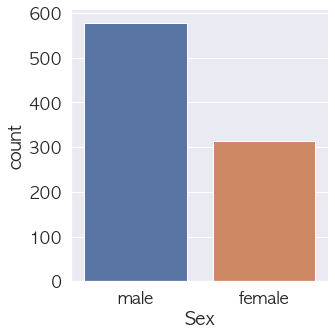

In [44]:
#Creating a factorplot, charting the number of male and female passengers
# Set the style to "whitegrid"
sns.set_style("whitegrid")
sns.set_palette("RdBu")



sns.set(font_scale=1.5,font="AppleGothic")

sns.catplot(x='Sex',data=titanic_df,kind='count')

Unsurprisingly, there were considerably more male passengers onboard.

Let's take a look at how the passengers were divided among different classes.

Note: The Pclass attribute is a proxy for the socio-economic class of a person.

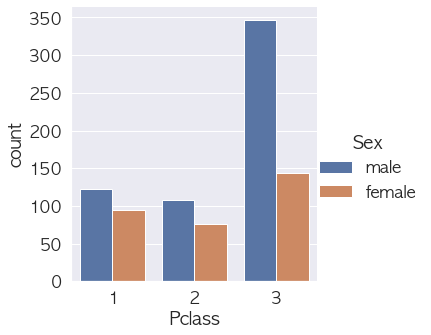

In [38]:
plt = sns.catplot(x='Pclass',data=titanic_df,hue='Sex',kind='count')
 


sns.set(font_scale=1.5,font="AppleGothic")

Another thing we can do before we start infering something from the above factorplot, is to divide the passengers between male, female, and a child.

In [70]:
#Function to detect if a person is a man, woman or child.
def man_wom_chi(passenger):
    age=passenger['Age']
    sex=passenger['Sex']
    
    return 'child' if age < 16 else sex

#Using Pandas' apply method to create a new column "Person"
titanic_df['Person'] = titanic_df.apply(man_wom_chi,axis=1)

In [41]:
#Looking at the first 10 rows in the dataset, to see if our method worked.
titanic_df[0:10]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female


In [42]:
#Getting the actual counts
print(titanic_df['Person'].value_counts())

male      537
female    271
child      83
Name: Person, dtype: int64


Now, let's create a factorplot to check out the distribution of men, women and children belonging to different classes.

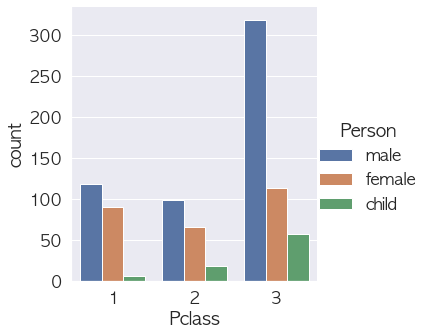

In [43]:
sns.catplot(x='Pclass',data=titanic_df,hue='Person',kind='count')


What's interesting to note above, is that there are way more male passengers than woman or childeren, in the 3rd class, than any other class. This will lead to an interesting analysis later on.

We can quickly create a histogram from the dataset, to check out the distribution of passengers of different age groups.

We can easily guess that the this is due to more number of male workers travelling on the ship.

<AxesSubplot:>

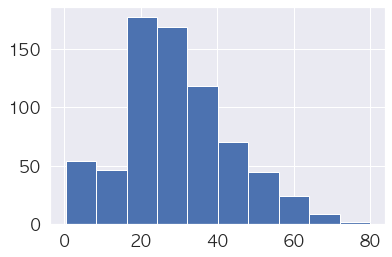

In [45]:
titanic_df['Age'].hist()

Let's check out how the age distribution varies for different classes. We'll use Seaborn's Facetgrid for this purpose.

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


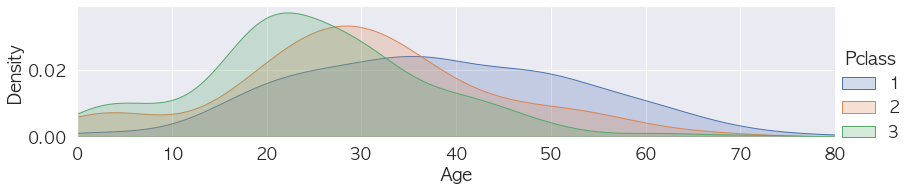

In [57]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True) #Probability density function

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

Quite clearly, we can see that the first class passengers belonged more to the middle age groups, with very few children.

Second and third class had more children, with relatively fewer older people.

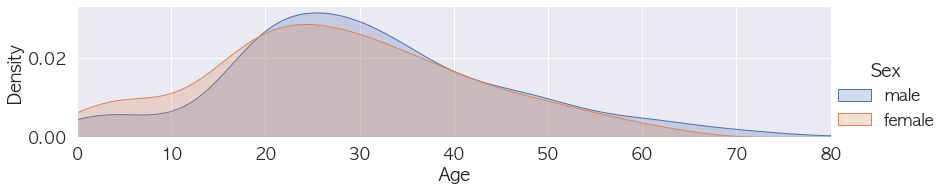

In [58]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

The age distribution seems to be less varied in terms of male and female passengers, though we can say that there more younger females than younger males.

## ->What deck were the passengers on and how does that relate to their class?
As we're doing open ended analysis, let's try and check out if people belonging to higher classes were assigned cabins on a higher deck (or level) of the ship.

In [60]:
#Because the cabin data was missing in a lot of cases, we can just drop it for now for this section.
deck_df = titanic_df.dropna(axis=0)

In [61]:
deck_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
PassengerId,,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female


How do we find out what deck a passenger was assigned?

The Cabin attribtute holds that data. Intuitively, the cabin number of a passenger is a combination of the deck they're on, and their room number. So a passenger on deck 'C' will have a cabin number in CXXX format, where XXX can be a room number.

We just need to create a python method to extract first character from the cabin information.

In [92]:
list1=[]
for y_a in deck_df["Cabin"]:
    list1.append(y_a[0])

or
#Grabbing the deck from the cabin numbers


def get_level(passenger):
    cabin = passenger['Cabin']
    return cabin[0]
    
    
deck_df['level']=deck_df.apply(get_level,axis=1)

In [95]:
deck_df['level']= list1

/var/folders/y9/7jjg2kks2396zw687mh2t7vc0000gn/T/ipykernel_4990/3660376151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deck_df['level']= list1


In [96]:
deck_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,level
PassengerId,,,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,E
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,G
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,C


In [103]:
deck_df.sort_values("level")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,level
PassengerId,,,,,,,,,,,,,
600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,male,A
648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C,male,A
210,1,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.0000,A31,C,male,A
868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,male,A
446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S,child,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,child,G
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,G
252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S,female,G


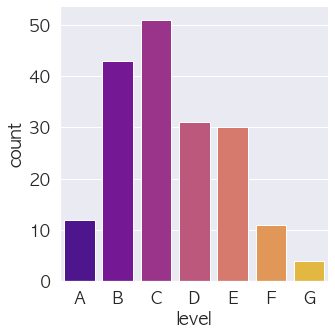

In [107]:

ca = ["A", "B","C", "D","E","F","G"]
sns.catplot(x='level',data=deck_df,palette='plasma',order =ca,kind='count')

And to answer our original question..

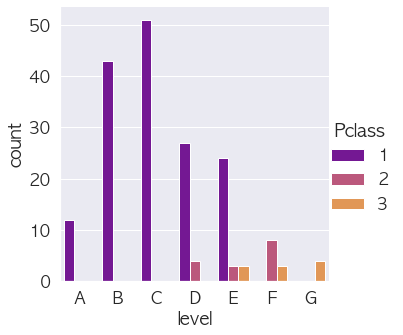

In [110]:
sns.catplot(x='level',data=deck_df,palette='plasma',order =ca,hue='Pclass',kind='count')

It feels like passengers belonging to the upper classes are indeed assigned to the upper decks. Decks A,B and C were assigned only to first class passengers, and we start seeing third class passengers only from level E. Though, we have to keep in mind that cabin information was missing for more than 3/4 of our passengers.

# Where did the passengers come from?
The Embarked attribute contains data for the passengers' port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

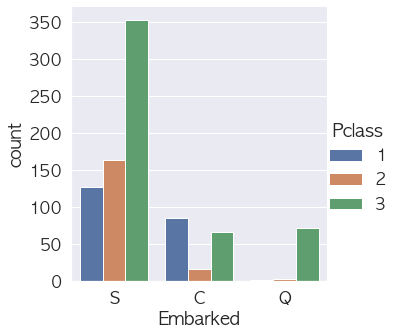

In [117]:
fig =sns.catplot(x='Embarked',data=titanic_df,hue='Pclass',kind='count')


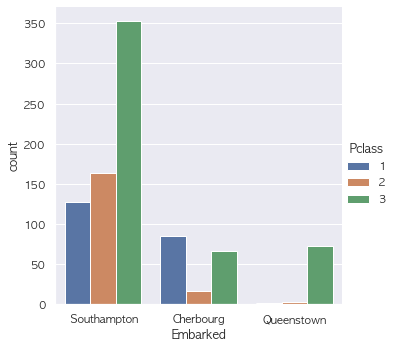

In [130]:
sns.set(rc = {'figure.figsize':(15,8)},font="AppleGothic")
fig =sns.catplot(x='Embarked',data=titanic_df,hue='Pclass',kind='count')
fig.set_xticklabels([' Southampton','Cherbourg','Queenstown'])

Most of the passengers embarked from Southampton (including Jack and Rose, in the movie). What's also interesting, is that almost no first or second class passengers embarked from Queenstown, which can tell us something about the socio-economic status of the population of Queenstown.



# Who was with their family?
Let's take another look at our data:

In [131]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


The SibsSP attribute refers to the number of siblings or spouses that a passenger had aboard. Parch refers to the number of parents or children someone had on the ship.

As we're just trying to know if a passenger had someone from his family onboard, we can make our life a bit easier by making another column to represent this data.

In [132]:
titanic_df.rename(columns={'SibSp': 'Siblings/Spouse','Parch': 'Parents/Child'})

,Survived,Pclass,Name,Sex,Age,Siblings/Spouse,Parents/Child,Ticket,Fare,Cabin,Embarked,Person
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female


In [133]:
#Adding the number of family a passenger had onboard
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [134]:
titanic_df.tail()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
PassengerId,,,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,male,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,female,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,female,3
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,male,0
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,male,0


Anything above the other than 0 in the new Alone column means that the person wasn't alone. So we're going to use that column to define our 'Alone' stats more clearly.

In [136]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'No'

titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Yes'

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [137]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,No
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,No
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Yes
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,No
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Yes


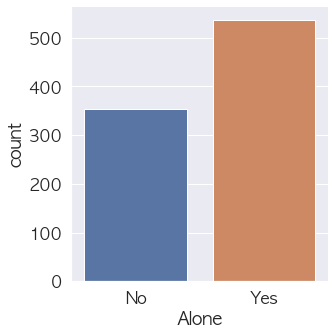

In [139]:
sns.set(font_scale=1.5,font="AppleGothic")
sns.catplot(x='Alone',data=titanic_df,kind='count')

The information is pretty simple to digest now. The majority of people on the ship had family on the ship. But did that make a difference in their chances of survival? We'll answer the question in the next section.

# What factors helped someone survive the sinking?
Looking at the factors which may have correlated to whether a person survived or not

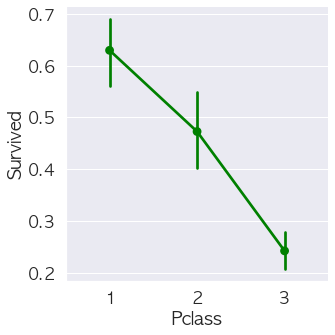

In [142]:
sns.catplot(x='Pclass',y='Survived',data=titanic_df,kind='point',color="green")

To not much surprise, it seems like lower class passengers had a lower chance of survival.

But wait, we saw earlier that there were more men than woman or children, in the 3rd class than in any other class. From the movie 'Titanic', you might remember the 'Women and children first!' protocol that the ship's administration followed while putting passengers on the lifeboats.

Let's see if this is really the case, by using the 'Person' column as the hue in the factorplot.

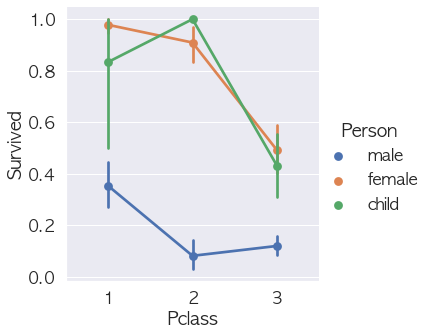

In [143]:
sns.catplot(x='Pclass',y='Survived',hue='Person',data=titanic_df, kind='point')

And this confirms our suspicion. Men had lower chances of survival than women and children, as they had lower priority of being saved.

We can still generally say that men, women and children belonging to the 3rd class had a lesser chance at survival than their counterparts belonging to the 1st class.

Let's see if there's a relation between the age and survival.

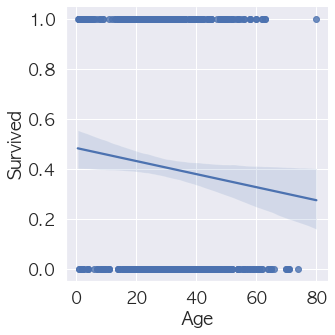

In [149]:
sns.lmplot(x='Age',y='Survived',data=titanic_df)

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


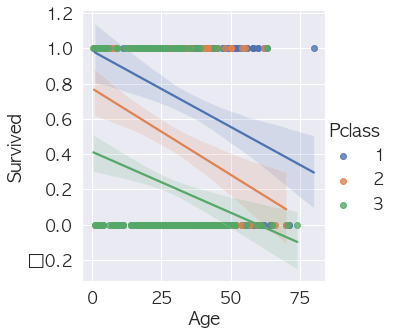

In [150]:
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df)

In [151]:
The general concensus from the above two figures seems to be that older people were less likely to survive regardless of their class

SyntaxError: invalid syntax (3486152786.py, line 1)

<AxesSubplot:xlabel='Alone', ylabel='Survived'>

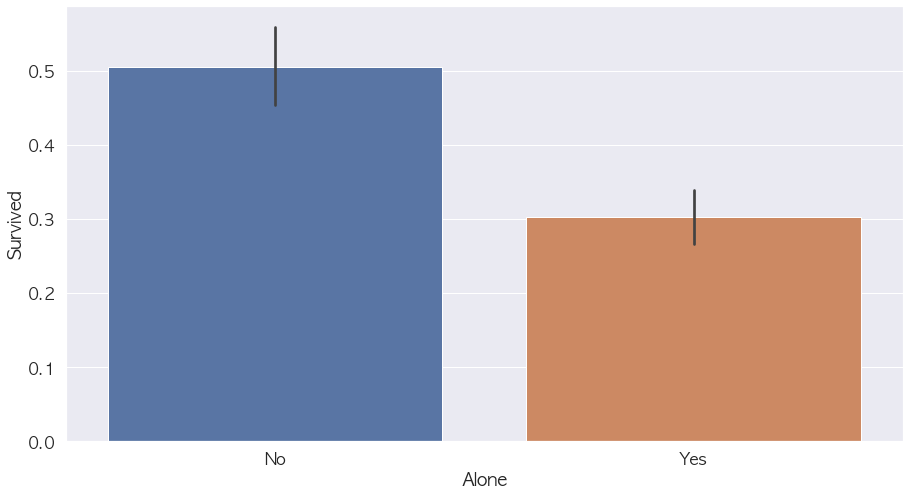

In [155]:
sns.barplot(x='Alone',y='Survived',data=titanic_df)

And if you knew someone on the ship, you had a higher chance of survival, than if you were all alone. Company's always good.

To add to this project, we can try running ML algorithms on the data (both the original dataset, and with the modifications we've made), to see if we can create a model that accurately predicts the survival of a passenger.

This notebook will be updated with those sections in the future.